# Read in data for brief single factor analysis(读入数据作简要单因子分析)

In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from pandas import set_option
set_option("display.max_rows",15)
set_option('display.width', 200)
import seaborn as sns
from sklearn import model_selection
import math
%matplotlib inline
# import tensorflow as tf

In [2]:
# 定义要输入的维度AC、CNL、DEN、GR、RD、RS  —— 自变量
input_vectors = ["DT","CNL","DEN","GR","RD","RS"]

In [3]:
# 定义要目标曲线PERM、POR、SW
element_names = ["DTXX","DT"]                 # ["PERM", "POR", "SW", "孔隙度","渗透率","饱和度","SH"] #   可能的目标计算维度
element =   "DTXX"  #     |  "PERM"， 观察的维度，实际实验得到因变量
reference =  "DT"  #   |  "渗透率" , 参考的维度，计算的因变量，参考值

In [7]:
# dataPath = os.path.join('data/train')
dataPath = os.path.join('../data/exp_curve_reconstract/exp_1/train/QSK')

In [8]:
filename = 'GY1_R_ 0.1250m_QSK_2107m-2587m.csv'
file = os.path.join(dataPath,filename)
# 读取A、B部分共有数据
# 调用pandas的read_csv()方法时，默认使用C engine作为parser engine，而当文件名中含有中文的时候，用C engine在部分情况下就会出错。所以在调用read_csv()方法时指定engine为Python就可以解决问题了。
AB = pd.read_csv(file,engine='python')
AB

,DEPTH,DT,CNL,DEN,GR,RD,RS,DTXX
0,2107.000,82.196225,17.3,2.451,120,4.91,5.11,168.247598
1,2107.125,81.984576,16.9,2.444,118,5.18,5.37,166.368776
2,2107.250,81.677681,16.3,2.437,116,5.40,5.60,165.172409
3,2107.375,81.509332,15.8,2.435,114,5.55,5.76,164.581235
4,2107.500,81.742845,15.7,2.448,116,5.57,5.82,164.762338
...,...,...,...,...,...,...,...,...
3836,2586.500,86.894184,15.4,2.652,138,5.31,6.30,169.218485
3837,2586.625,85.568864,14.9,2.651,136,5.35,6.32,162.964982
3838,2586.750,81.355412,14.0,2.646,135,5.59,6.52,156.272841
3839,2586.875,76.638988,12.5,2.645,127,6.50,7.39,149.232910


## Data cleaning(数据清洗)

In [9]:
# AB.tail()
AB.isna().sum()

DEPTH    0
DT       0
CNL      0
DEN      0
GR       0
RD       0
RS       0
DTXX     0
dtype: int64

In [10]:
AB = AB.dropna()

In [11]:
# AB 

In [12]:
X = AB.loc[:,input_vectors]
Y = AB.loc[:, element]  

In [13]:
# train_dataset = AB.sample(frac=0.8,random_state=0)
# test_dataset = AB.drop(train_dataset.index)

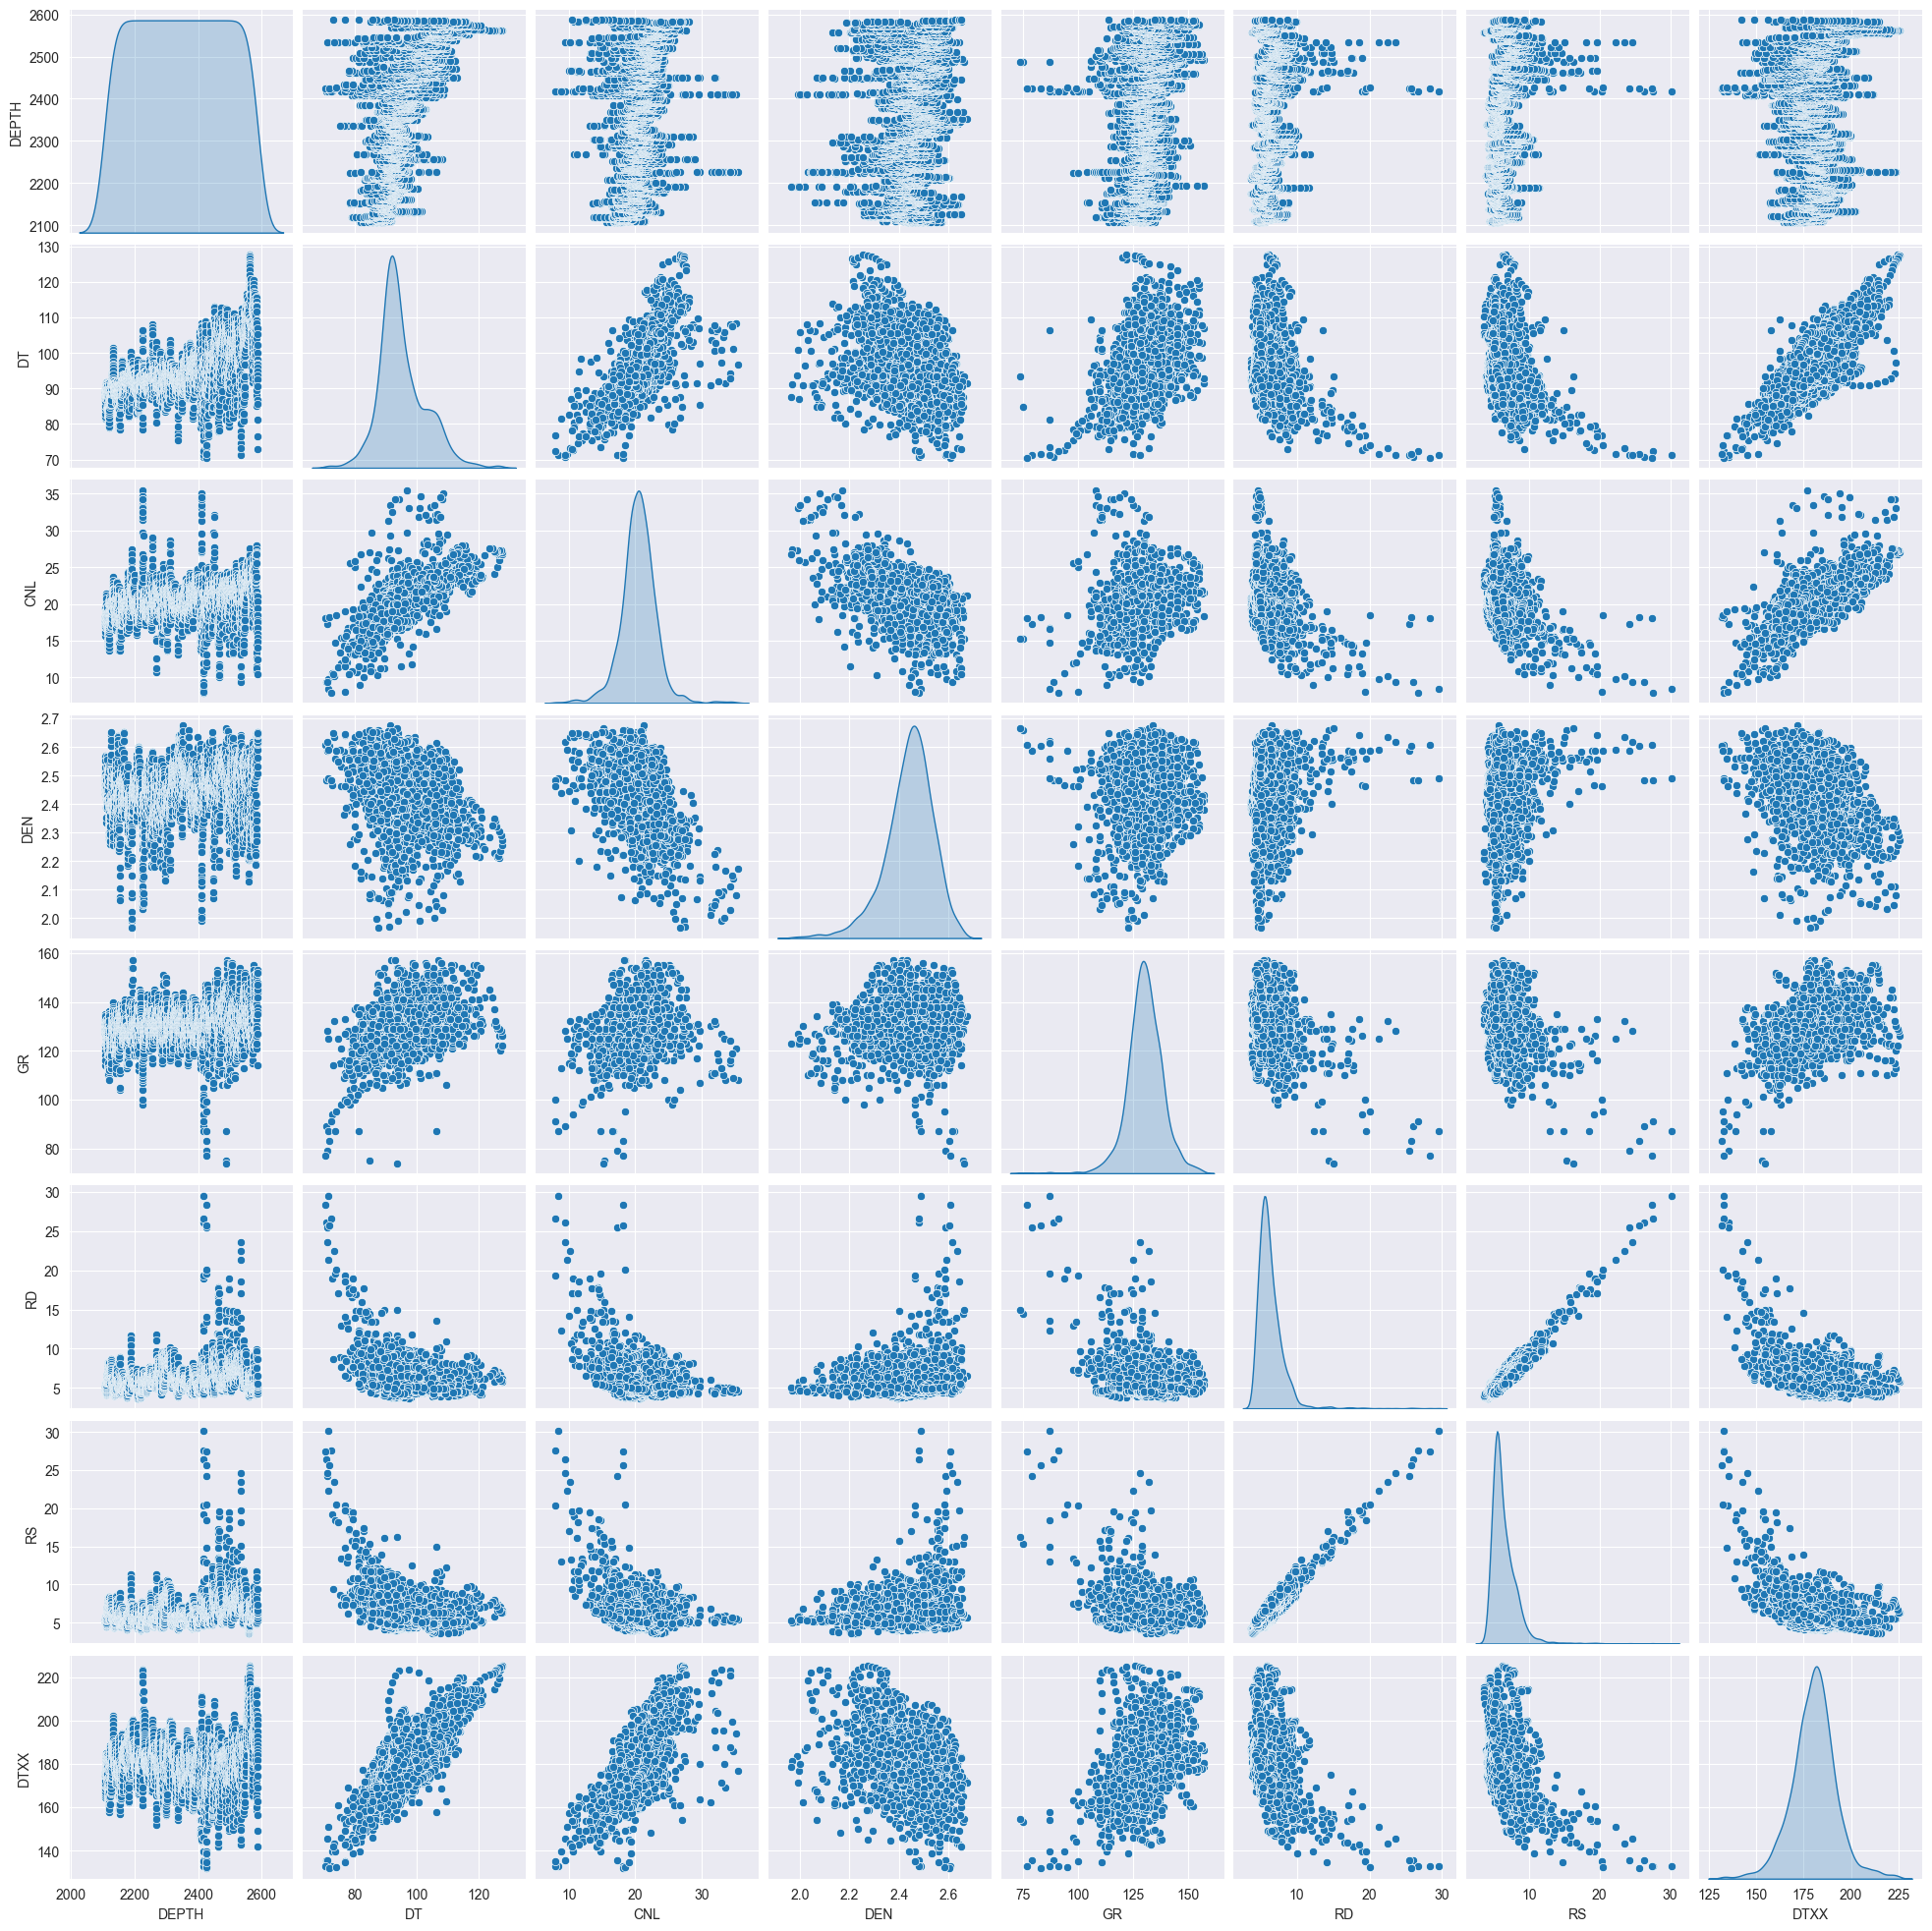

In [14]:
# sns.pairplot(AB.loc[:,element_names], diag_kind="kde")
sns.pairplot(AB, diag_kind="kde")

## Analyze the dimensions to be trained(分析要训练的维度)

In [15]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [16]:
POR = AB.loc[:, element]
POR_ref = AB.loc[:, reference]

In [17]:
POR_ref.shape,POR.shape

((3841,), (3841,))

In [18]:
POR_ref = np.array(POR_ref)
POR = np.array(POR)
POR.shape = (len(POR),)
POR_ref.shape= (len(POR_ref),)

In [19]:
POR_ref.shape,POR.shape

((3841,), (3841,))

In [20]:
# values.tolist()
POR_ref = POR_ref.tolist()
POR = np.array(POR).tolist()

In [21]:
# POR_ref,POR
xValue = list(range(0, 101))
yValue = [x * np.random.rand() for x in xValue]

In [22]:
# POR_ref,POR

In [23]:
if element == 'PERM':
    POR_ref,POR = np.log10(POR_ref),np.log10(POR)

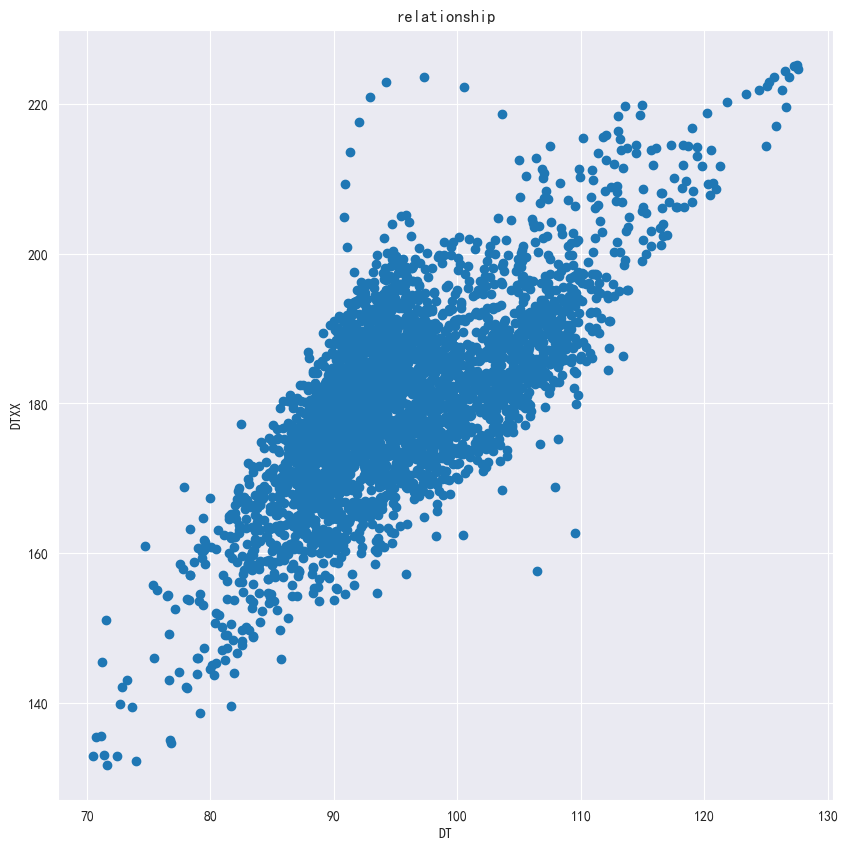

In [24]:
plt.figure(figsize=(10, 10))
# plt.title("relationship" + model_type.lower())
plt.title("relationship")
# plt.scatter(xValue,yValue,color="red", label="ALL_pred")
# plt.scatter(POR,POR_ref)
 # 下面一行为坐标轴负号不显示乱码问题
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(POR_ref,POR)
plt.xlabel(reference)
plt.ylabel(element)
plt.show()

In [25]:
minX = np.min(X)
maxX = np.max(X)
minY = np.min(Y)
maxY = np.max(Y)

In [26]:
minX,maxX

(1.966, 157.0)

In [27]:
minY,maxY

(131.7215944, 225.2525799)

In [28]:
# 去除横纵坐标为全0的值
AB_1 =AB[~AB[element].isin([0])]
AB_use =AB_1[~AB_1[reference].isin([0])]

In [29]:
# AB_use

In [30]:
X = AB_use.loc[:,input_vectors]
Y = AB_use.loc[:, element]  
Y_GT = AB_use.loc[:, reference]  

In [31]:
minX = np.min(X)
maxX = np.max(X)
minY = np.min(Y)
maxY = np.max(Y)
minY_GT = np.min(Y_GT)
maxY_GT = np.max(Y_GT)

In [32]:
minY,maxY,minY_GT,maxY_GT

(131.7215944, 225.2525799, 70.52609035, 127.5748293)

In [33]:
minX,maxX

(1.966, 157.0)

In [34]:
goal = AB_use.loc[:, element]
# goal = np.array(goal)
goal

0       168.247598
1       166.368776
2       165.172409
3       164.581235
4       164.762338
           ...    
3836    169.218485
3837    162.964982
3838    156.272841
3839    149.232910
3840    142.077324
Name: DTXX, Length: 3841, dtype: float64

In [35]:
refer = AB_use.loc[:, reference]
# refer = np.array(refer)
refer

0       82.196225
1       81.984576
2       81.677681
3       81.509332
4       81.742845
          ...    
3836    86.894184
3837    85.568864
3838    81.355412
3839    76.638988
3840    72.828514
Name: DT, Length: 3841, dtype: float64

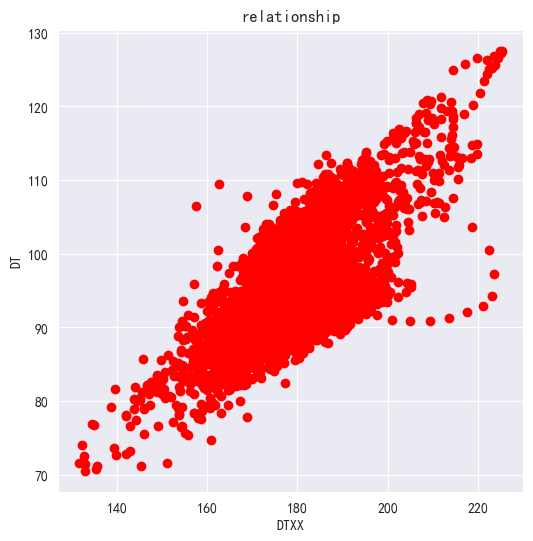

In [36]:
plt.figure(figsize=(6, 6))
# plt.title("relationship" + model_type.lower())
plt.title("relationship")
plt.scatter(goal,  refer,color="red")
plt.xlabel(element)
plt.ylabel(reference)
# plt.legend(loc='best')
plt.grid(True)#显示网格线
# plt.savefig(model_testing_img_file_saving_path + model_testing_image_name + 'ValAll.jpg', dpi=220,  bbox_inches='tight')
plt.show()

In [37]:
np.set_printoptions(suppress=True, threshold=5000)
# goal,refer

# Analyze linear correlation(分析线性相关性)

In [38]:
import statsmodels.api as sm

In [39]:
refer= sm.add_constant(refer) # adding a constant
ols = sm.OLS(goal, refer).fit()

In [40]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DTXX   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3789.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:40:54   Log-Likelihood:                -13627.
No. Observations:                3841   AIC:                         2.726e+04
Df Residuals:                    3839   BIC:                         2.727e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.9358      1.702     44.619      0.000      72.599      79.272
DT             1.0978      0.018     61.553      0.000       1.063       1.133
==============================================================================
Omnibus:                       41.477   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.388
Skew:                           0.109   Prob(JB):                     4.68e-14
Kurtosis:                       3.579   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
set_option("display.max_rows",5000)
# goal